### Task 1 - Hierarchical Clustering

In [1]:
# Required imports
import pandas as pd
import numpy as np
import scipy as sp
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import os

%matplotlib inline
np.set_printoptions(precision=5, suppress=True)

In [2]:
# Reading the data
filename = "data_avshirod.csv"
dir_path = os.getcwd()
plt_path = dir_path + "/plots"
data = pd.read_csv(filename, header=None)

In [3]:
# Taking a look at the data
# print(data.head())
# print(data.shape)
# print(data.describe())

In [4]:
# Tut - https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/
# Task 1 - Hierarchical clustering
z = linkage(data, 'average') # can try 'single', 'complete', 'average', 'ward'

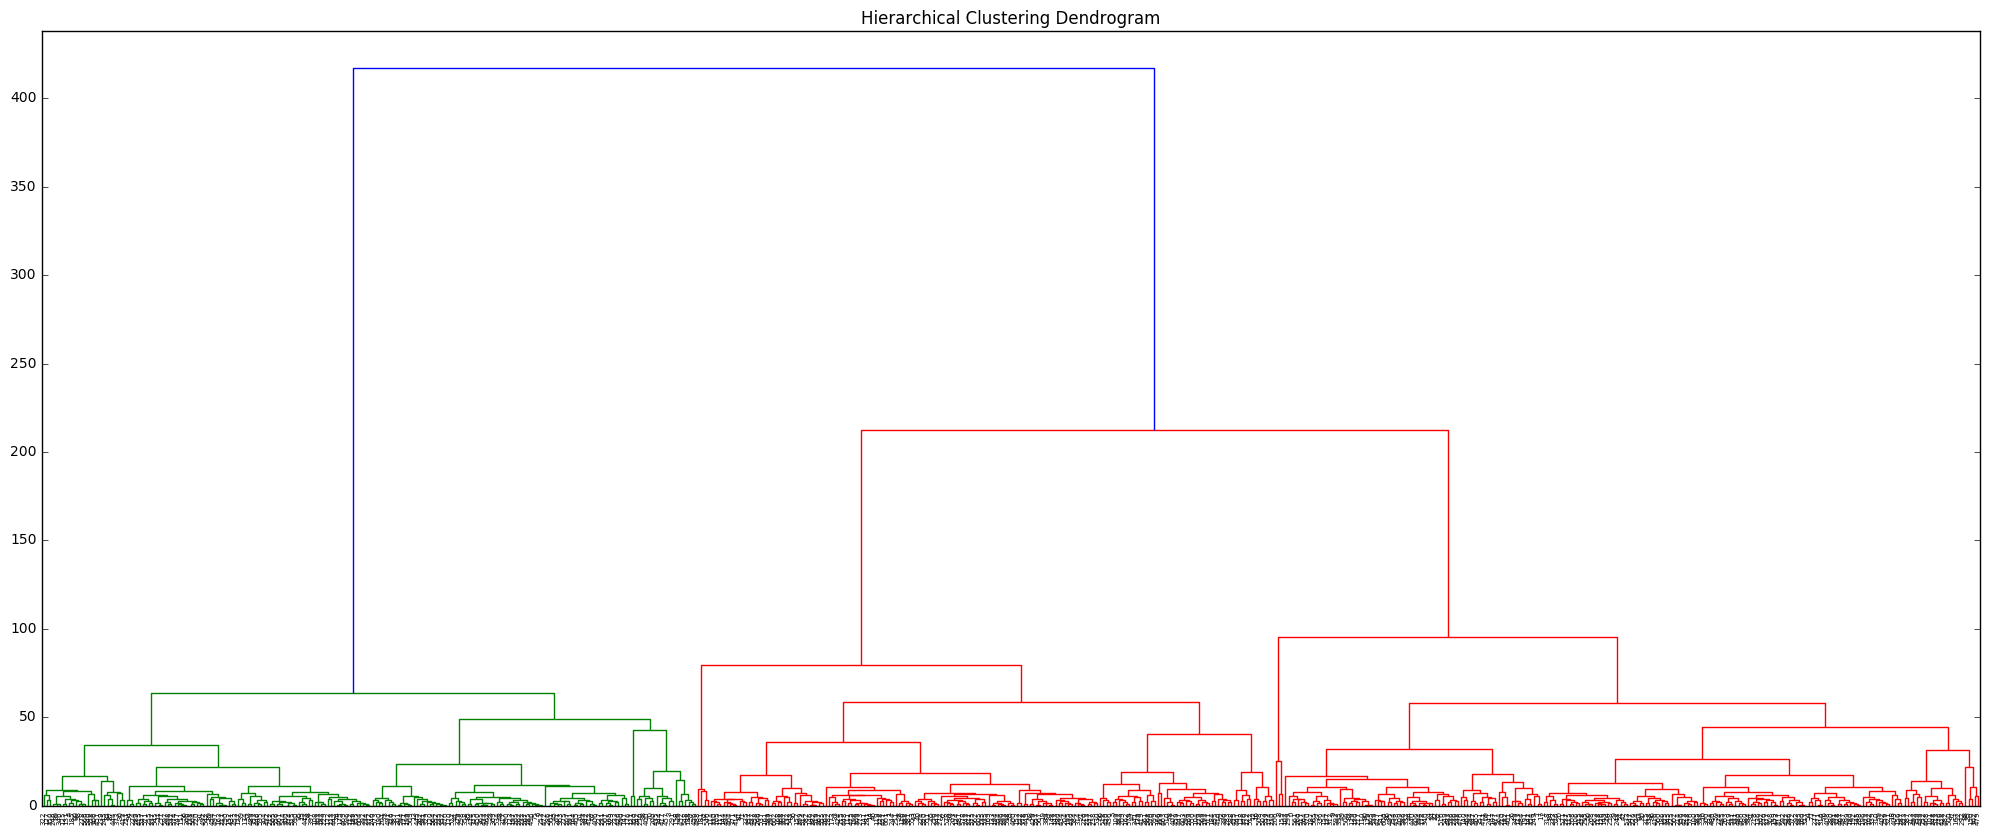

In [5]:
# Plot the dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
dendrogram(z, leaf_rotation=90.)
plt.savefig(plt_path + "/t1_complete_dendrogram")
plt.show()

In [6]:
print("The Distance Graph")
print(z)

The Distance Graph
[[   56.        366.          0.12432     2.     ]
 [  286.        501.          0.13712     2.     ]
 [  300.        374.          0.16424     2.     ]
 ..., 
 [ 1196.       1206.         95.46092   221.     ]
 [ 1209.       1210.        212.20798   402.     ]
 [ 1208.       1211.        417.06746   607.     ]]


The dendrogram above shows all the possible cluster merges.
As we can see, the last few cluster merges are over huge distances.

Let's look at the last 25 cluster merges.

In [7]:
# Determine the number of clusters from the distance graph
print(z[-25:,2])

[  17.82464   18.78663   19.18175   19.27295   19.77626   21.8171
   22.28025   23.51153   25.21493   26.30723   31.49872   32.06449
   34.36441   36.07909   40.50265   42.76128   44.39705   49.0624    58.164
   58.80579   64.06627   79.90267   95.46092  212.20798  417.06746]


The jump over the distance for merges for the last two merges is very large.
It grows slowly till about 95, and then suddenly jumps to 212.

Hence, we can decide our cut-off (threshold) value to be somewhere around **95.46092**, say **100**.

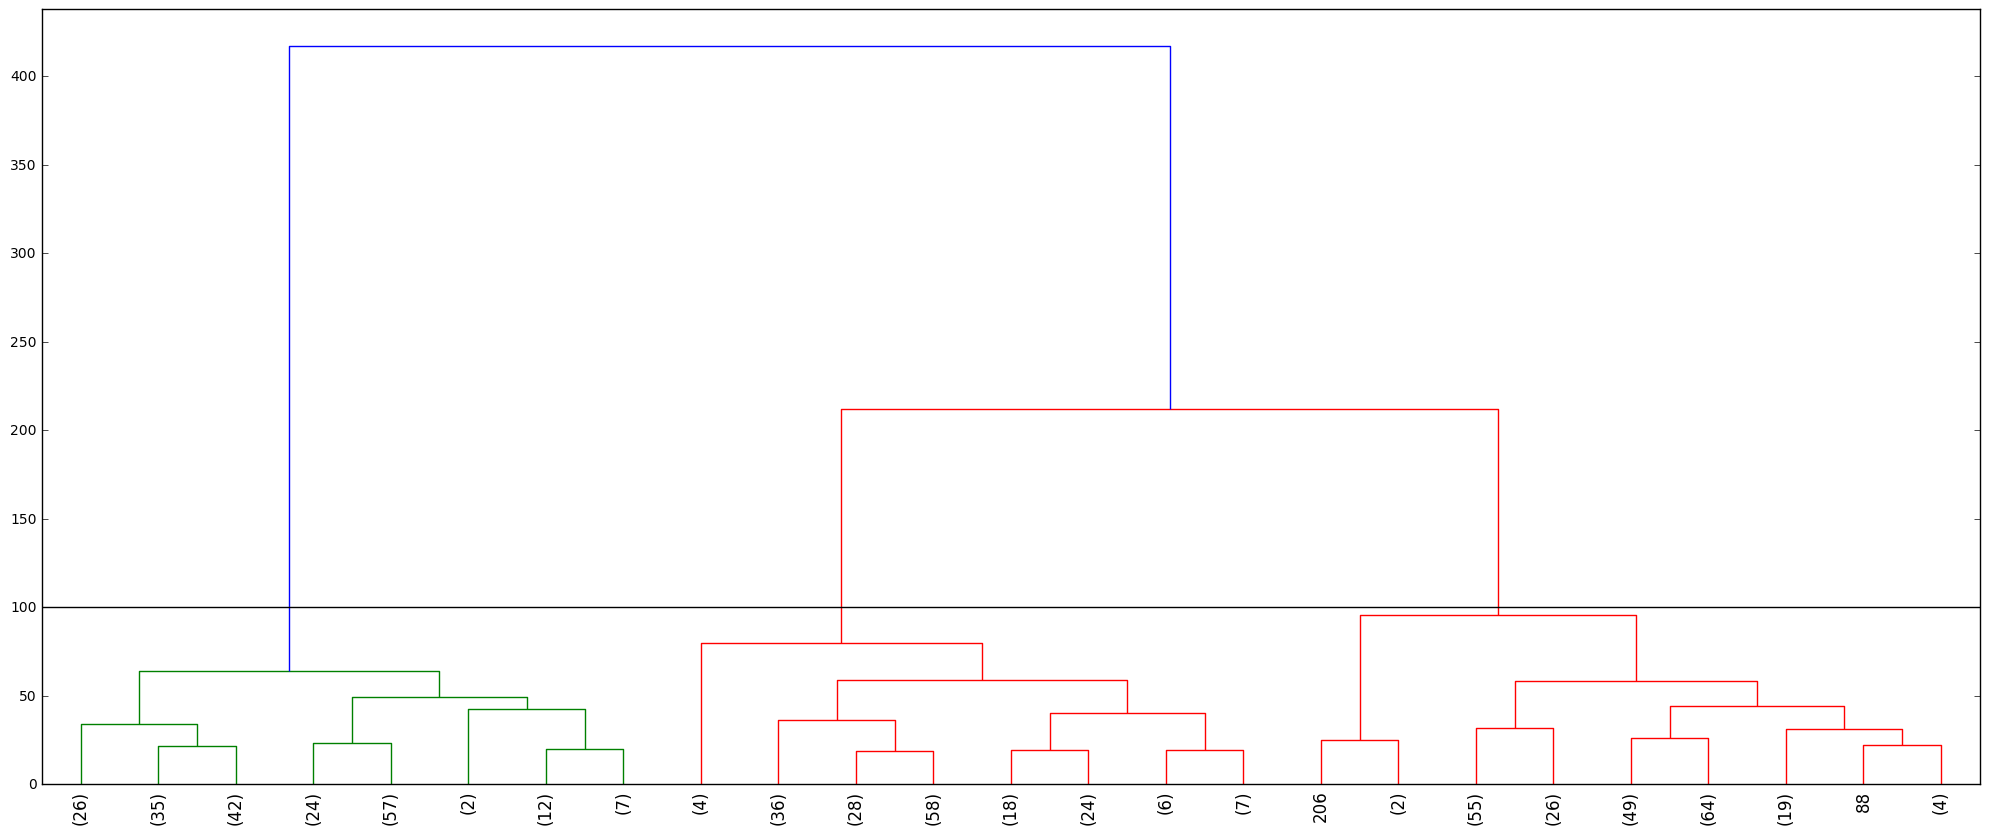

In [8]:
max_d = 100
plt.figure(figsize=(25, 10))
dendrogram(z, leaf_rotation=90., leaf_font_size = 12., truncate_mode='lastp', p=25)
plt.axhline(y=max_d, c='k')
plt.savefig(plt_path + "/t1_truncated_dendrogram")
plt.show()

In the truncated Dendrogram above, we can see visually that setting the threshold to **100** gives us three distinct clusters.

Using **`fcluster`** method from *scipy.cluster.hierarchy*, we can get cluster_IDs, which we can use to print the scatter plot.

<IPython.core.display.Javascript object>


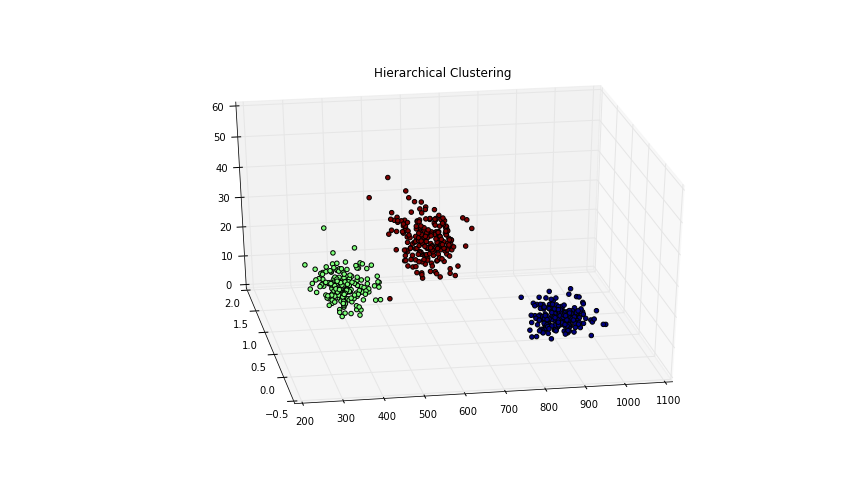

In [11]:
%matplotlib notebook
# Color the data according to their cluster, and do a 3D scatter diagram.
clusters = fcluster(z, max_d, criterion='distance')
fig = plt.figure(figsize=(12, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data[0], data[1], data[2], c=clusters, depthshade=False)
ax.view_init(elev=30, azim=260)
ax.set_title("Hierarchical Clustering")
fig.savefig(plt_path + "/t1_scatter")

# Rotate the diagram to identify the clusters.
# for ii in range(0,360,1):
#     ax.view_init(elev=10., azim=ii)
#     fig.savefig(plt_path + "/temp/movie%d.png" % ii)

In [10]:
# print(clusters)
# print("Sil_Score for Hierarchical Clustering = %r " % (silhouette_score(data, clusters, metric='euclidean')))

We can clearly observe **Three** distinct clusters in above plot.

The outliers can be seen as well. (There is a point near the green cluster which is classified as a red one.)